In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

# Análise - ENEM 2022 e 2020

## **Analisando os datasets**

(ênfase inicial no de 2020, haja vista que o de 2022 já fora analisado a priori na pasta analysis_2022)

In [2]:
df_2022 = pd.read_csv('../../data/enem_2022_v2.csv', low_memory=False, encoding="ISO-8859-1")

In [3]:
df_2020 = pd.read_csv('../../data/enem_2020.csv', low_memory=False, encoding="ISO-8859-1")

In [4]:
df_2020.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783109 entries, 0 to 5783108
Data columns (total 35 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   NU_ANO                  int64  
 1   TP_FAIXA_ETARIA         int64  
 2   TP_SEXO                 object 
 3   TP_ESTADO_CIVIL         int64  
 4   TP_COR_RACA             int64  
 5   TP_NACIONALIDADE        int64  
 6   TP_ST_CONCLUSAO         int64  
 7   TP_ANO_CONCLUIU         int64  
 8   TP_ESCOLA               int64  
 9   IN_TREINEIRO            int64  
 10  NO_MUNICIPIO_ESC        object 
 11  SG_UF_ESC               object 
 12  TP_DEPENDENCIA_ADM_ESC  float64
 13  TP_LOCALIZACAO_ESC      float64
 14  TP_PRESENCA_CN          int64  
 15  TP_PRESENCA_CH          int64  
 16  TP_PRESENCA_LC          int64  
 17  TP_PRESENCA_MT          int64  
 18  NU_NOTA_CN              float64
 19  NU_NOTA_CH              float64
 20  NU_NOTA_LC              float64
 21  NU_NOTA_MT              float64

In [5]:
df_2020.describe()

,NU_ANO,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q005
count,5783109.0,5.783109e+06,5.783109e+06,5.783109e+06,5.783109e+06,5.783109e+06,5.783109e+06,5.783109e+06,5.783109e+06,904569.000000,904569.000000,5.783109e+06,5.783109e+06,5.783109e+06,5.783109e+06,2.597440e+06,2.754140e+06,2.754140e+06,2.597440e+06,2.754140e+06,2.754140e+06,5.687143e+06
mean,2020.0,6.400507e+00,1.095643e+00,2.146922e+00,1.031476e+00,1.452596e+00,3.316860e+00,1.276176e+00,9.638847e-02,2.441257,1.034515,4.496357e-01,4.777531e-01,4.777531e-01,4.496357e-01,4.904098e+02,5.111522e+02,5.238009e+02,5.205783e+02,1.113882e+00,5.734127e+02,3.711457e+00
std,0.0,4.165703e+00,4.819935e-01,1.012238e+00,2.088103e-01,6.909719e-01,4.538629e+00,5.191631e-01,2.951233e-01,0.912757,0.182547,4.979524e-01,5.010185e-01,5.010185e-01,4.979524e-01,7.999999e+01,9.622299e+01,7.454600e+01,1.173055e+02,7.300496e-01,1.998202e+02,1.474033e+00
min,2020.0,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,2020.0,3.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,2.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.270000e+02,4.353000e+02,4.780000e+02,4.258000e+02,1.000000e+00,4.600000e+02,3.000000e+00
50%,2020.0,5.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,2.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.837000e+02,5.125000e+02,5.299000e+02,5.051000e+02,1.000000e+00,5.800000e+02,4.000000e+00
75%,2020.0,1.100000e+01,1.000000e+00,3.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00,3.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.487000e+02,5.806000e+02,5.764000e+02,6.023000e+02,1.000000e+00,7.000000e+02,4.000000e+00
max,2020.0,2.000000e+01,4.000000e+00,5.000000e+00,4.000000e+00,4.000000e+00,1.400000e+01,3.000000e+00,1.000000e+00,4.000000,2.000000,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,8.548000e+02,8.626000e+02,8.011000e+02,9.750000e+02,9.000000e+00,1.000000e+03,2.000000e+01


In [6]:
df_2020.head()

,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,NO_MUNICIPIO_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q008,Q010,Q022,Q024,Q025
0,2020,11,F,1,2,1,1,11,1,0,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,11,M,2,3,1,1,11,1,0,NaN,NaN,NaN,NaN,1,1,1,1,604.1,661.7,595.3,711.3,1.0,580.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,4,F,2,3,2,2,0,2,0,Salvador,BA,2.0,1.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,B,C,A,D,3.0,B,B,A,A,A,A
3,2020,2,M,1,3,1,2,0,2,0,Santana de ParnaÃ­ba,SP,3.0,1.0,1,1,1,1,620.8,675.0,624.2,759.4,1.0,760.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,4,F,1,3,2,1,1,1,0,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,B,G,B,B,3.0,B,B,A,B,A,B


In [7]:
df_2020.tail()

,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,NO_MUNICIPIO_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q008,Q010,Q022,Q024,Q025
5783104,2020,2,F,1,1,1,2,0,2,0,CrateÃºs,CE,2.0,1.0,1,1,1,1,508.3,661.4,658.3,725.7,1.0,900.0,E,G,A,D,5.0,G,C,B,D,B,B
5783105,2020,3,M,1,1,1,2,0,2,0,TrÃªs Lagoas,MS,1.0,1.0,1,1,1,1,570.5,646.1,607.2,719.5,1.0,660.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5783106,2020,3,F,1,1,1,1,1,1,0,NaN,NaN,NaN,NaN,1,1,1,1,418.8,597.5,674.5,648.1,1.0,660.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5783107,2020,4,F,1,1,1,2,0,3,0,CuiabÃ¡,MT,4.0,1.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,G,G,E,E,5.0,N,D,C,E,D,B
5783108,2020,2,F,1,3,1,2,0,2,0,SÃ£o LuÃ­s,MA,2.0,1.0,1,1,1,1,478.5,625.5,538.4,481.7,1.0,380.0,F,D,D,B,5.0,C,B,B,D,A,B


Comparando se ambos os datasets possuem as mesmas colunas

In [8]:
df_2022.columns

Index(['NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL',
       'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU',
       'TP_ESCOLA', 'IN_TREINEIRO', 'NO_MUNICIPIO_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_PRESENCA_CN',
       'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'NU_NOTA_CN',
       'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006',
       'Q008', 'Q010', 'Q022', 'Q024', 'Q025'],
      dtype='object')

In [9]:
df_2020.columns

Index(['NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL',
       'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU',
       'TP_ESCOLA', 'IN_TREINEIRO', 'NO_MUNICIPIO_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_PRESENCA_CN',
       'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'NU_NOTA_CN',
       'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006',
       'Q008', 'Q010', 'Q022', 'Q024', 'Q025'],
      dtype='object')

## **Estatísticas da variável: Tipo da escola do Ens. Médio (TP_ESCOLA)**

*Dicionário - Base de dados do governo:*

1 - Não respondeu

2 - Pública

3 - Privada

**Geral**

Comparando entre anos a quantidade de todas as categorias da coluna TP_ESCOLA

In [10]:
df_2022['TP_ESCOLA'].value_counts()

TP_ESCOLA
1    2158545
2    1105355
3     212205
Name: count, dtype: int64

In [11]:
df_2020['TP_ESCOLA'].value_counts()

TP_ESCOLA
1    4387282
2    1194496
3     201331
Name: count, dtype: int64

Análise descritiva

In [12]:
media_geral_2022 = df_2022["TP_ESCOLA"].mean()
minimo_geral_2022 = df_2022["TP_ESCOLA"].min()
maximo_geral_2022 = df_2022["TP_ESCOLA"].max()
mediana_geral_2022 = df_2022["TP_ESCOLA"].median()

print(f"ANÁLISE DESCRITIVA GERAL - 2022: \nMédia: {media_geral_2022}\nMínimo: {minimo_geral_2022}\nMáximo: {maximo_geral_2022}\nMediana: {mediana_geral_2022}")

ANÁLISE DESCRITIVA GERAL - 2022: 
Média: 1.440080204711883
Mínimo: 1
Máximo: 3
Mediana: 1.0


In [13]:
media_geral_2020 = df_2020["TP_ESCOLA"].mean()
minimo_geral_2020 = df_2020["TP_ESCOLA"].min()
maximo_geral_2020 = df_2020["TP_ESCOLA"].max()
mediana_geral_2020 = df_2020["TP_ESCOLA"].median()

print(f"ANÁLISE DESCRITIVA GERAL - 2020: \nMédia: {media_geral_2020}\nMínimo: {minimo_geral_2020}\nMáximo: {maximo_geral_2020}\nMediana: {mediana_geral_2020}")

ANÁLISE DESCRITIVA GERAL - 2020: 
Média: 1.2761763611925696
Mínimo: 1
Máximo: 3
Mediana: 1.0


Específica

In [14]:
df_2022["MEDIA_GERAL"] = df_2022[["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]].mean(axis=1)

df_2022.head()

,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,NO_MUNICIPIO_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q008,Q010,Q022,Q024,Q025,MEDIA_GERAL
0,2022,14,M,2,2,1,1,2,1,0,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,A,A,A,B,3,B,B,B,A,A,A,NaN
1,2022,14,M,2,1,1,1,16,1,0,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,D,D,E,E,3,Q,E,E,E,E,B,NaN
2,2022,5,F,1,2,1,1,2,1,0,NaN,NaN,NaN,NaN,1,1,1,1,421.1,546.0,498.8,565.3,1.0,760.0,E,F,A,D,2,B,B,A,C,A,B,558.24
3,2022,6,M,1,3,1,1,2,1,0,NaN,NaN,NaN,NaN,1,1,1,1,490.7,388.6,357.8,416.0,1.0,320.0,C,A,A,B,3,A,C,A,C,B,B,394.62
4,2022,4,M,0,3,1,1,1,1,0,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,D,B,A,B,2,B,B,A,B,A,A,NaN


In [15]:
df_2022[["MEDIA_GERAL", "TP_ESCOLA"]].groupby("TP_ESCOLA").describe()

MEDIA_GERAL                                                          \
                count        mean        std  min         25%     50%     75%   
TP_ESCOLA                                                                       
1           1490185.0  543.701272  91.562736  0.0  484.780000  541.32  603.38   
2            812792.0  513.516246  85.629968  0.0  462.938333  516.12  570.24   
3            201037.0  606.711452  79.021646  0.0  555.900000  611.00  662.02   

                   
              max  
TP_ESCOLA          
1          855.98  
2          841.10  
3          855.82

In [16]:
df_2020["MEDIA_GERAL"] = df_2020[["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]].mean(axis=1)

df_2020.head()

,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,NO_MUNICIPIO_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q008,Q010,Q022,Q024,Q025,MEDIA_GERAL
0,2020,11,F,1,2,1,1,11,1,0,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,11,M,2,3,1,1,11,1,0,NaN,NaN,NaN,NaN,1,1,1,1,604.1,661.7,595.3,711.3,1.0,580.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,630.48
2,2020,4,F,2,3,2,2,0,2,0,Salvador,BA,2.0,1.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,B,C,A,D,3.0,B,B,A,A,A,A,NaN
3,2020,2,M,1,3,1,2,0,2,0,Santana de ParnaÃ­ba,SP,3.0,1.0,1,1,1,1,620.8,675.0,624.2,759.4,1.0,760.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,687.88
4,2020,4,F,1,3,2,1,1,1,0,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,B,G,B,B,3.0,B,B,A,B,A,B,NaN


In [17]:
df_2020[["MEDIA_GERAL", "TP_ESCOLA"]].groupby("TP_ESCOLA").describe()

MEDIA_GERAL                                                       \
                count        mean        std  min      25%     50%     75%   
TP_ESCOLA                                                                    
1           1903298.0  522.372995  93.402686  0.0  456.720  513.16  582.28   
2            692713.0  504.432150  85.672880  0.0  446.260  499.02  560.10   
3            166888.0  604.089011  87.229375  0.0  544.575  609.80  668.28   

                   
              max  
TP_ESCOLA          
1          858.58  
2          843.26  
3          852.76

## **Estatísticas da variável: Localização (Escola) (TP_LOCALIZACAO_ESC)**

*Dicionário - Base de dados do governo:*

1 - Urbana

2 - Rural

In [18]:
df_2022[["MEDIA_GERAL", "TP_LOCALIZACAO_ESC"]].groupby("TP_LOCALIZACAO_ESC").describe()

MEDIA_GERAL                                              \
                         count        mean        std  min     25%     50%   
TP_LOCALIZACAO_ESC                                                           
1.0                   707811.0  541.623758  94.585411  0.0  482.28  543.08   
2.0                    23863.0  503.549966  92.002994  0.0  447.12  505.10   

                                    
                       75%     max  
TP_LOCALIZACAO_ESC                  
1.0                 606.66  855.82  
2.0                 567.14  782.36

In [19]:
df_2020[["MEDIA_GERAL", "TP_LOCALIZACAO_ESC"]].groupby("TP_LOCALIZACAO_ESC").describe()

MEDIA_GERAL                                              \
                         count        mean        std  min     25%     50%   
TP_LOCALIZACAO_ESC                                                           
1.0                   549521.0  539.167392  98.163406  0.0  468.62  535.02   
2.0                    16256.0  500.625128  91.661495  0.0  436.85  494.66   

                                    
                       75%     max  
TP_LOCALIZACAO_ESC                  
1.0                 609.18  852.76  
2.0                 562.92  812.40

## **Estatísticas de ambas variáveis**

*Dicionário - Base de dados do governo:*

1 - Não respondeu

2 - Pública : 1 - Urbana; 2 - Rural

3 - Privada : 1 - Urbana; 2 - Rural

In [20]:
df_2022[["MEDIA_GERAL", "TP_ESCOLA", "TP_LOCALIZACAO_ESC"]].groupby(["TP_ESCOLA", "TP_LOCALIZACAO_ESC"]).describe()

MEDIA_GERAL                                       \
                                   count        mean        std  min      25%   
TP_ESCOLA TP_LOCALIZACAO_ESC                                                    
2         1.0                   530359.0  518.435323  87.977664  0.0  466.200   
          2.0                    23101.0  500.951589  91.221664  0.0  445.180   
3         1.0                   177452.0  610.928107  78.368945  0.0  560.735   
          2.0                      762.0  582.323075  80.018287  0.0  530.165   

                                                      
                                 50%     75%     max  
TP_ESCOLA TP_LOCALIZACAO_ESC                          
2         1.0                 521.46  577.30  841.10  
          2.0                 502.52  563.78  776.92  
3         1.0                 615.36  665.72  855.82  
          2.0                 584.92  637.13  782.36

In [21]:
df_2020[["MEDIA_GERAL", "TP_ESCOLA", "TP_LOCALIZACAO_ESC"]].groupby(["TP_ESCOLA", "TP_LOCALIZACAO_ESC"]).describe()

MEDIA_GERAL                                 \
                                   count        mean        std     min   
TP_ESCOLA TP_LOCALIZACAO_ESC                                              
2         1.0                   405811.0  513.967065  89.389494    0.00   
          2.0                    15642.0  497.637887  90.895117    0.00   
3         1.0                   143710.0  610.328548  86.172493    0.00   
          2.0                      614.0  576.726781  77.179839  309.18   

                                                               
                                 25%     50%      75%     max  
TP_ESCOLA TP_LOCALIZACAO_ESC                                   
2         1.0                 452.70  509.68  573.840  835.52  
          2.0                 434.54  490.73  558.635  812.40  
3         1.0                 552.40  616.88  673.320  852.76  
          2.0                 524.36  577.72  629.375  758.50

## Gráficos

In [22]:
import matplotlib.pyplot as plt
plt.style.use('_mpl-gallery')

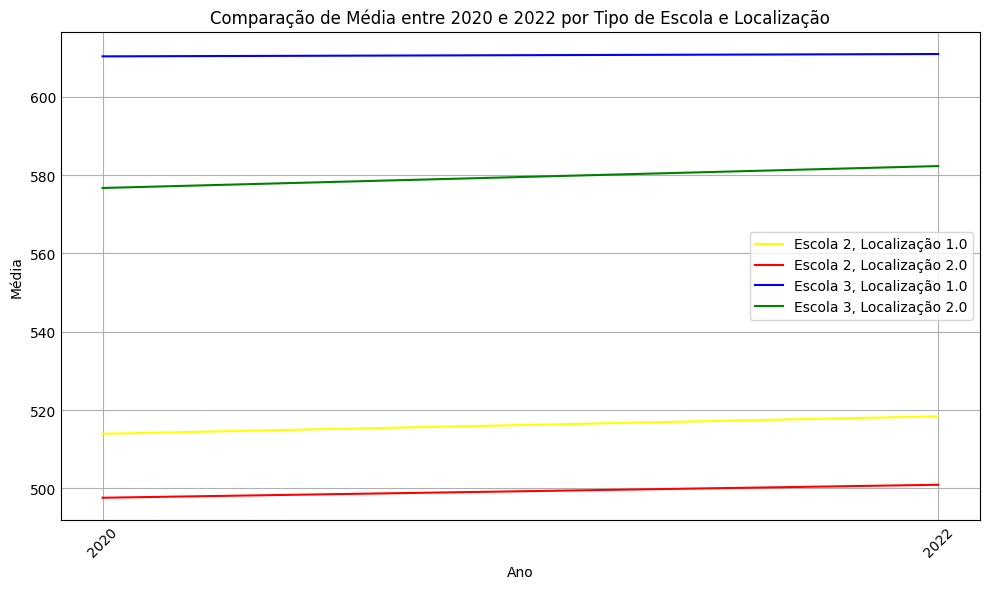

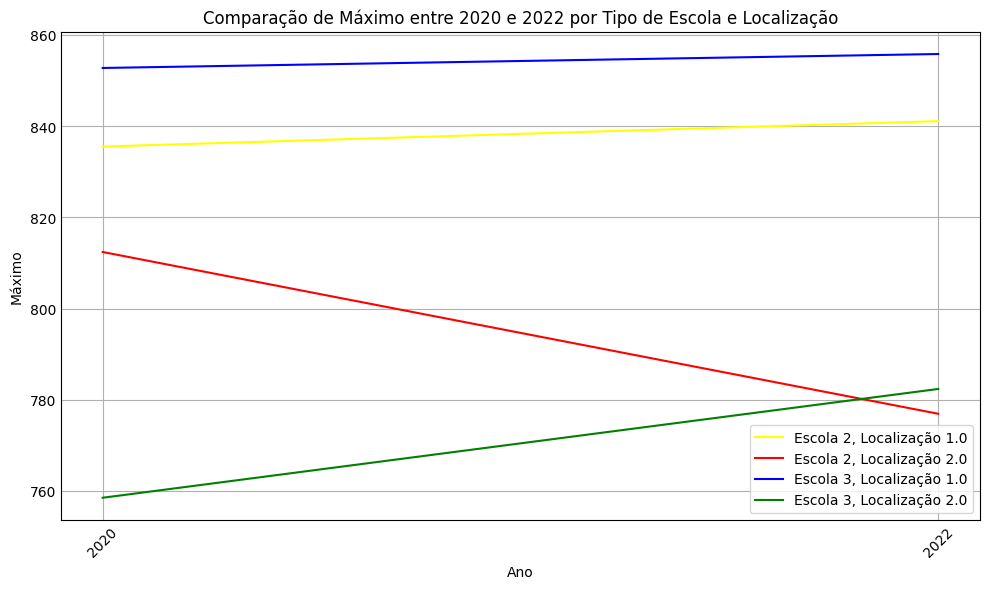

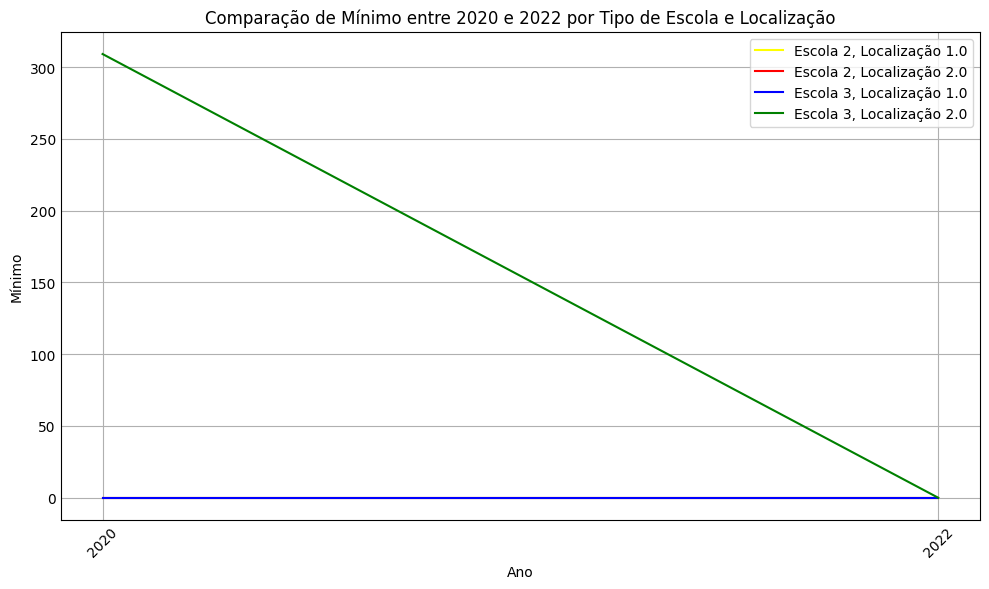

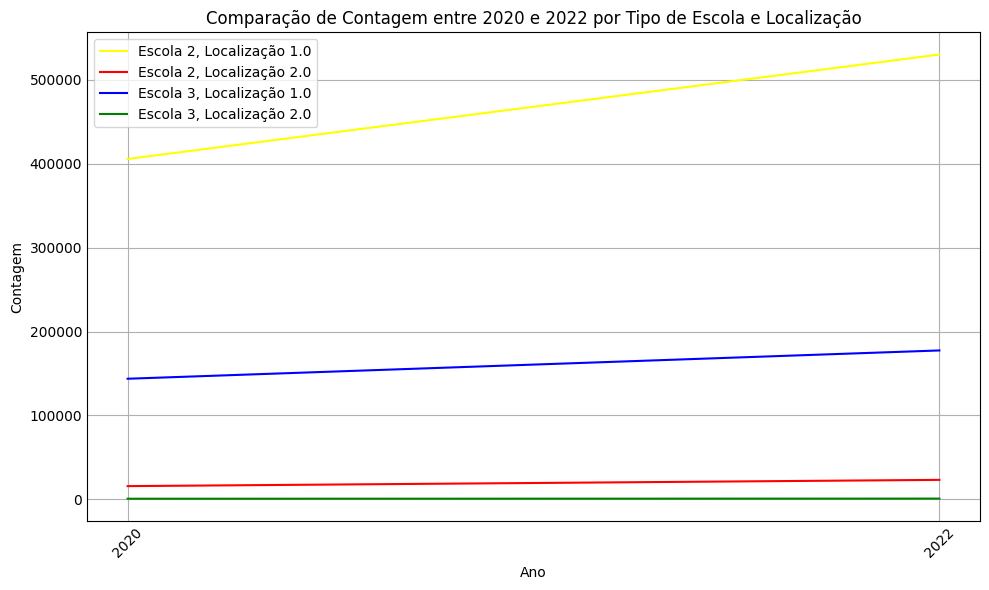

In [27]:
# Colunas para análise
columns = ["MEDIA_GERAL", "TP_ESCOLA", "TP_LOCALIZACAO_ESC"]

# Agrupamento e descrição para 2020
df_2020_grouped = df_2020[columns].groupby(["TP_ESCOLA", "TP_LOCALIZACAO_ESC"]).describe()

# Agrupamento e descrição para 2022
df_2022_grouped = df_2022[columns].groupby(["TP_ESCOLA", "TP_LOCALIZACAO_ESC"]).describe()

# Cores para as linhas
line_colors = ["yellow", "red", "blue", "green"]

# Medidas para comparar (média, máximo, mínimo, contagem)
measures = ["mean", "max", "min", "count"]
measure_labels = ["Média", "Máximo", "Mínimo", "Contagem"]

# Para cada medida, um gráfico de comparação
for measure, measure_label in zip(measures, measure_labels):
    plt.figure(figsize=(10, 6))
    for i, (tp_escola, tp_localizacao_esc) in enumerate(df_2020_grouped.index):
        plt.plot(
            ["2020", "2022"],
            [
                df_2020_grouped.loc[(tp_escola, tp_localizacao_esc), ("MEDIA_GERAL", measure)],
                df_2022_grouped.loc[(tp_escola, tp_localizacao_esc), ("MEDIA_GERAL", measure)]
            ],
            label=f"Escola {tp_escola}, Localização {tp_localizacao_esc}",
            color=line_colors[i]
        )

    plt.xlabel("Ano")
    plt.ylabel(measure_label)
    plt.title(f"Comparação de {measure_label} entre 2020 e 2022 por Tipo de Escola e Localização")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
